In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

- - - 

## Finding out the name of the tables and columns

In [10]:
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns_m = inspector.get_columns("Measurement")
for column in columns_m:
    print(column["name"])

id
station
date
prcp
tobs


In [13]:
columns_s = inspector.get_columns("Station")
for column in columns_s:
    print(column["name"])

id
station
name
latitude
longitude
elevation


# Exploratory Climate Analysis

## Precipitation Analysis

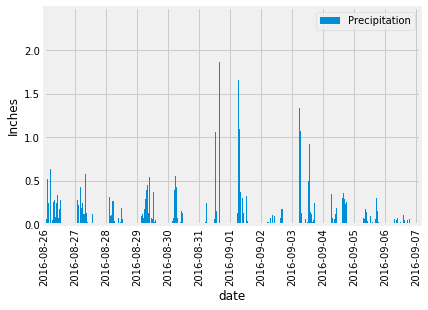

In [78]:
# Calculate the date 1 year ago from the last data point in the database
# Last date in the database and conversting it to a date format
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

yyyy = int(last_date[0][0:4])
mm = int(last_date[0][5:7])
dd = int(last_date[0][8:10])

date_year_ago = dt.date(yyyy, mm, dd) - dt.timedelta(weeks=52)
date_str = str(date_year_ago)

# Design a query to retrieve the last 12 months of precipitation data 
presip_df = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date_str).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
presip_df = pd.DataFrame(presip_df).set_index("date")

# Sort the dataframe by date
presip_group = presip_df.groupby("date").mean()
presip_group = presip_group.rename(columns = {"prcp": "Precipitation"})

# Use Pandas Plotting with Matplotlib to plot the data
presip_group.plot(kind="bar")
plt.ylabel("Inches")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(36))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
presip_group.describe()

,Presipitation
count,364.000000
mean,0.166182
std,0.287042
min,0.000000
25%,0.008571
50%,0.070000
75%,0.189167
max,2.380000


## Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
stations_no = session.query(Station.station).all()
print(f"The number of stations in this dataset is {len(stations_no)}")

The number of stations in this dataset is 9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Getting the data from the Measurements dataset and making it into a dataframe
measurements = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
measurements = pd.DataFrame(measurements)

In [18]:
# Finding the most active stations
stations_grouped = measurements.groupby("station").count().sort_values(by="tobs", ascending=False)
stations_grouped

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [20]:
# Lowest temperature recorded
low_t = measurements.groupby("station").get_group("USC00519281").min()["tobs"]
print(f"The lowest temperature recorded is {low_t}")

The lowest temperature recorded is 54.0


In [21]:
# Highest temperature recorded
high_t = measurements.groupby("station").get_group("USC00519281").max()["tobs"]
print(f"The highest temperature recorded is {high_t}")

The highest temperature recorded is 85.0


In [22]:
# Average temperature recorded
avg_t = measurements.groupby("station").get_group("USC00519281").mean()["tobs"]
print(f"The average temperature recorded is {avg_t}")

The average temperature recorded is 71.66378066378067


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [24]:
data_highest_tob = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").filter(Measurement.date > date_str).all()
data_highest_tob = pd.DataFrame(data_highest_tob)
data_highest_tob.head()


,station,date,tobs
0,USC00519281,2016-08-25,80.0
1,USC00519281,2016-08-26,80.0
2,USC00519281,2016-08-27,75.0
3,USC00519281,2016-08-28,73.0
4,USC00519281,2016-08-29,78.0


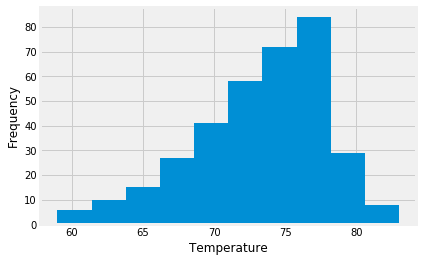

In [25]:
data_highest_tob["tobs"].plot(kind="hist")
plt.xlabel("Temperature")
plt.show()

In [32]:
tmin = session.query(func.min(Measurement.tobs)).filter(Measurement.date > "2016-08-24").all()
tmin[0][0]

58.0